In [1]:
%reload_ext cbc
import cbc, numpy as np, matplotlib.pyplot as plt

In [41]:
waist = 4e-6
wavelength = 1.5e-7
a, b, c = 2e-5, 2.5e-5, 3e-5
Nx, Ny, Nz = 20, 20, 21
detNx, detNy = 512, 512
pix_size = 55e-3 / 4
det_dist = 54

In [42]:
axis = np.random.rand(3)
theta = 2 * np.pi * np.random.random()

In [43]:
latargs = cbc.lat_args(a=a, b=b, c=c, Nx=Nx, Ny=Ny, Nz=Nz)
koutargs = cbc.kout_args(det_dist=det_dist, detNx=detNx, detNy=detNy, pix_size=pix_size)
diff = cbc.diff(lat_args=latargs, kout_args=koutargs, waist=waist, wavelength=wavelength)
# diff.move_lat()

In [44]:
def Rs(pts, waist=1e-4, wavelength=1.5e-7):
    """
    Return incoming wavevector of gaussian beam for given coordinate (x, y, z).

    waist - beam waist radius
    wavelength - light wavelength

    Return a np.array of three incoming wavevector coordinates.
    """
    k = 2 * np.pi / wavelength
    zr = k * waist**2 / 2
    xs, ys, zs = pts.T
    Rs = zs + zr**2 / zs
    return Rs

[[-0.2568493  -0.25322734 -0.24660401 ...  0.24660401  0.25322734
   0.2568493 ]
 [-0.32106163 -0.31653418 -0.30825501 ...  0.30825501  0.31653418
   0.32106163]
 [-0.91156342 -0.91415646 -0.91878469 ...  0.91878469  0.91415646
   0.91156342]]


/Users/simply_nicky/OneDrive/programming/Convergent beam crystallography/cbc/functions.py:133: RuntimeWarning: divide by zero encountered in true_divide
  Rs = zs + zr**2 / zs
/Users/simply_nicky/OneDrive/programming/Convergent beam crystallography/cbc/functions.py:134: RuntimeWarning: invalid value encountered in true_divide
  return np.dstack((xs, ys, Rs))[0] / np.sqrt(xs**2 + ys**2 + Rs**2)[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


ValueError: supplied range of [-0.0037731388543390753, inf] is not finite

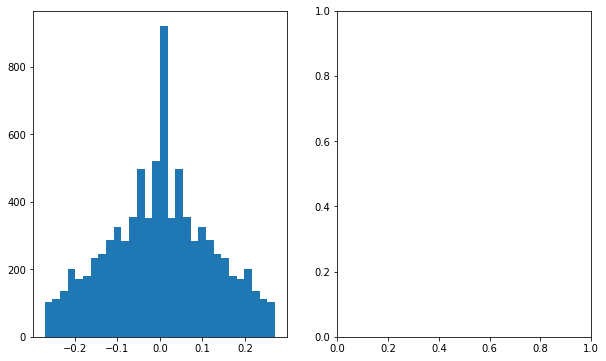

In [45]:
%matplotlib inline
kins = cbc.kins(diff.lat_pts, diff.waist, diff.wavelength).T
rs = Rs(diff.lat_pts, diff.waist, diff.wavelength).T

print(kins[0:10])
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(10, 6))
ax1.hist(kins[0], 30)
ax2.hist(rs, 30)
plt.show()

In [39]:
ind = np.argmax(Rs(diff.lat_pts, diff.waist, diff.wavelength))
Rs(diff.lat_pts[ind], waist, wavelength)

0.007501277708678151